# Exercise 6.4

**Steps 1-3:**

In [2]:
path = r'C:/Users/javed/Achievement 6'

In [3]:
%matplotlib inline

In [1]:
#1. Install the scikit-learn library.

In [1]:
#2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#3. Clean your data so that it’s ready for analysis.
df = pd.read_excel(os.path.join(path, 'Data', 'ac6_dataset.xlsx'), index_col = False)

In [5]:
df.isnull().sum()

Date Reported          0
Country Code         691
Country                0
New Cases              0
Cumulative Cases       0
New Deaths             0
Cumulative Deaths      0
dtype: int64

In [5]:
df_nan = df[df['Country Code'].isnull() == True]

In [22]:
df_nan

,Date Reported,Country Code,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
30824,2021-11-21,NaN,Namibia,9,129085,2,3569
30825,2021-11-22,NaN,Namibia,0,129085,0,3569
30826,2021-11-23,NaN,Namibia,20,129105,0,3569
30835,2021-11-19,NaN,Namibia,5,129074,1,3567
30836,2021-11-20,NaN,Namibia,2,129076,0,3567
...,...,...,...,...,...,...,...
142950,2020-07-06,NaN,Namibia,37,412,0,0
142951,2020-07-07,NaN,Namibia,73,485,0,0
142952,2020-07-08,NaN,Namibia,54,539,0,0
142953,2020-07-09,NaN,Namibia,54,593,0,0


We see that the 'null values' are not actually null values, rather they represent the country of **Namibia.**

In [6]:
# Fixing the Country Code issue:
# The Country Code column does not add or take away from the analysis, so it is redundant and can be dropped.

df = df.drop('Country Code', 1)

In [7]:
df.isnull().sum()

Date Reported        0
Country              0
New Cases            0
Cumulative Cases     0
New Deaths           0
Cumulative Deaths    0
dtype: int64

In [11]:
df.to_excel(os.path.join(path, 'Data', 'ac6_data.xlsx'), index=False)

In [8]:
dups = df.duplicated()

In [9]:
dups.shape

(163076,)

No duplicates found.

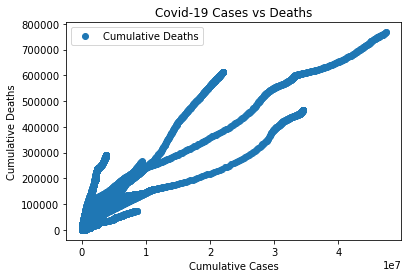

In [7]:
#4. Explore your data visually , looking for variables whose relationship you’d like to test.

df.plot(x='Cumulative Cases', y='Cumulative Deaths', style='o')
plt.title('Covid-19 Cases vs Deaths')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

plt.show()

In [ ]:
#5. State your hypothesis in a markdown cell within your Jupyter notebook.

New deaths and new cases do not have a strong correlation.

In [8]:
#6. Reshape the variables into NumPy arrays.

X = df['Cumulative Cases'].values.reshape(-1,1)
y = df['Cumulative Deaths'].values.reshape(-1,1)

In [16]:
X

array([[ 61596],
       [115925],
       [120516],
       ...,
       [     1],
       [     0],
       [     0]], dtype=int64)

In [17]:
y

array([[ 428],
       [1840],
       [3911],
       ...,
       [   0],
       [   0],
       [   0]], dtype=int64)

In [9]:
#7. Split data into two sets: a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
#8. Run a linear regression on the data. Fit the model you created to the training set, and create a prediction for y on the test set.
regression = LinearRegression()

In [11]:
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
y_predicted = regression.predict(X_test)

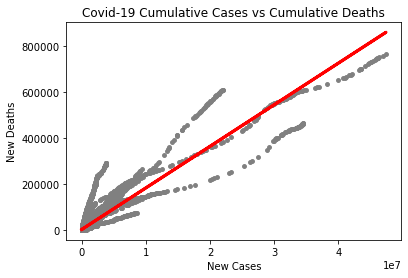

In [15]:
#9. Create a plot that shows the regression line on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Covid-19 Cumulative Cases vs Cumulative Deaths')
plot_test.xlabel('New Cases')
plot_test.ylabel('New Deaths')
plot_test.show()

In [ ]:
#10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

While still not the best fit, the line in this scatterplot fits better than the previous chart.

In [23]:
#11. Check the model performance statistics—MSE and R2.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01444534]]
Mean squared error:  9132.317678026457
R2 score:  0.6698308388841818


In [25]:
#12. Compare the predicted y values with the actual y values in a dataframe.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,9.104000
1,0,9.118446
2,21,22.321483
3,7,11.400809
4,45,48.944237
5,0,9.017328
6,0,9.031774
7,1,30.627551
8,0,9.017328
9,0,9.017328


In [ ]:
#13. Include your thoughts on how well the model performed on the test set in a markdown cell.

The model did not perform well. This can be seen by looking at the y values for the 'Actuals' and 'Predicted', as the numbers are way off.